In [1]:
import pymysql
import pandas as pd
import numpy as np

# mysql Connection
conn = pymysql.connect(host = '192.168.101.106',user = 'root',password = '1111',db = 'asiancup',charset = 'utf8')

#Connection으로 부터 cursor생성 - 테이터 베이스 빈줄에 커서가 깜빡 거리고 있는 것이다.
curs = conn.cursor()
 
# SQL 문장
# 2011년도
sql1 = 'select * from nations2011'
curs.execute(sql1) # 실행문 - 결과는 데이터가 몇개 있는지 알려준다.
rows1 = curs.fetchall()

# 2015년도
sql2 = 'select * from nations2015'
curs.execute(sql2) # 실행문 - 결과는 데이터가 몇개 있는지 알려준다.
rows2 = curs.fetchall()

In [2]:
# Data Fetch 후 데이터 프레임으로 변환
year2011 = pd.DataFrame(list(rows1))
year2011.head()

,0,1,2,3,4,5,6,7,8,9
0,1,"['16-Jan-11', '19:15']",카타르,6,23,43,4,24,92,11295
1,2,"['12-Jan-11', '19:15']",카타르,4,16,51,1,21,92,11295
2,3,"['21-Jan-11', '16:25']",카타르,7,18,41,1,17,92,11295
3,4,"['08-Jan-11', '16:15']",쿠웨이트,2,17,51,1,23,96,10350
4,5,"['12-Jan-11', '16:15']",쿠웨이트,3,14,48,1,21,96,10350


In [3]:
# Data Fetch 후 데이터 프레임으로 변환
year2015 = pd.DataFrame(list(rows2))
year2015.head()

,0,1,2,3,4,5,6,7,8,9
0,1,"['31-Jan-15', '20:00']",한국,3,19,47,4,24,51,2306476
1,2,"['30-Jan-15', '20:00']",이라크,7,20,37,1,24,89,9586
2,3,"['27-Jan-15', '20:00']",오스트레일리아,3,15,53,3,19,100,1534325
3,4,"['26-Jan-15', '20:00']",한국,7,7,53,3,20,51,2306476
4,5,"['23-Jan-15', '20:30']",일본,8,17,68,1,27,53,7021535


In [4]:
conn.close()

In [5]:
year_tot = pd.concat([year2015,year2011])
year_tot = year_tot.drop(columns=0)
year_tot.columns = ['기간','국가','유효슈팅','반칙','점유율','날씨','기온','피파랭킹','팀연봉']
year_tot.head()

,기간,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉
0,"['31-Jan-15', '20:00']",한국,3,19,47,4,24,51,2306476
1,"['30-Jan-15', '20:00']",이라크,7,20,37,1,24,89,9586
2,"['27-Jan-15', '20:00']",오스트레일리아,3,15,53,3,19,100,1534325
3,"['26-Jan-15', '20:00']",한국,7,7,53,3,20,51,2306476
4,"['23-Jan-15', '20:30']",일본,8,17,68,1,27,53,7021535


In [6]:
year_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 63
Data columns (total 9 columns):
기간      128 non-null object
국가      128 non-null object
유효슈팅    128 non-null int64
반칙      128 non-null int64
점유율     128 non-null int64
날씨      128 non-null int64
기온      128 non-null int64
피파랭킹    128 non-null int64
팀연봉     128 non-null int64
dtypes: int64(7), object(2)
memory usage: 10.0+ KB


In [7]:
# 국가 카테고리 1~18번까지 바뀌기 전 값(한글 내림차순으로 바뀐 것)
check = year_tot['국가'].unique()
check.sort()
print(check)

['바레인' '북한' '사우디아라비아' '시리아' '아랍에미리트' '오만' '오스트레일리아' '요르단' '우즈베키스탄' '이라크'
 '이란' '인도' '일본' '중국' '카타르' '쿠웨이트' '팔레스타인' '한국']


In [8]:
# 국가별 csv 나누기
for i in check:
    tm = year_tot[year_tot['국가'] == '%s'%i]
    tm.to_csv('./nationseperate_{0}_190214.csv'.format(i), index=False, header=True)

----

In [9]:
# 컬럼별로 숫자가 높을 수록 좋은건지 안 좋은 건지 바꿔줘야함(통일시켜야함)
# 반칙 수, 랭킹 => 높을수록 안좋음...
# 랭킹은 211위가 꼴찌라 212에서 빼면 역순.
year_tot['피파랭킹'] = 212-year_tot['피파랭킹']
year_tot.head()

,기간,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉
0,"['31-Jan-15', '20:00']",한국,3,19,47,4,24,161,2306476
1,"['30-Jan-15', '20:00']",이라크,7,20,37,1,24,123,9586
2,"['27-Jan-15', '20:00']",오스트레일리아,3,15,53,3,19,112,1534325
3,"['26-Jan-15', '20:00']",한국,7,7,53,3,20,161,2306476
4,"['23-Jan-15', '20:30']",일본,8,17,68,1,27,159,7021535


In [10]:
# # 반칙은 일단 50에서 빼보자 = 최대가 35
# # 이러면 반칙 수가 클수록 실제 반칙 횟수가 적은 것이 됨. 피파랭킹도
# year_tot['반칙'] = 50-year_tot['반칙']
# year_tot.head()

In [11]:
# 위에 값이 이상해서 그냥 -를 붙여보자
year_tot['반칙'] = -year_tot['반칙']
year_tot.head()

,기간,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉
0,"['31-Jan-15', '20:00']",한국,3,-19,47,4,24,161,2306476
1,"['30-Jan-15', '20:00']",이라크,7,-20,37,1,24,123,9586
2,"['27-Jan-15', '20:00']",오스트레일리아,3,-15,53,3,19,112,1534325
3,"['26-Jan-15', '20:00']",한국,7,-7,53,3,20,161,2306476
4,"['23-Jan-15', '20:30']",일본,8,-17,68,1,27,159,7021535


In [12]:
# pd.set_option('display.float_format', '{:.5f}'.format) 지수없애기

In [13]:
# 날씨, 국가는 카테고리로 일단 바꾸기
year_tot['날씨'] = year_tot['날씨'].astype('category')
year_tot['국가'] = year_tot['국가'].astype('category')

In [14]:
year_tot['국가'].cat.categories = ['%s'%i for i in range(1,19)]

In [15]:
year_tot.head()

,기간,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉
0,"['31-Jan-15', '20:00']",18,3,-19,47,4,24,161,2306476
1,"['30-Jan-15', '20:00']",10,7,-20,37,1,24,123,9586
2,"['27-Jan-15', '20:00']",7,3,-15,53,3,19,112,1534325
3,"['26-Jan-15', '20:00']",18,7,-7,53,3,20,161,2306476
4,"['23-Jan-15', '20:30']",13,8,-17,68,1,27,159,7021535


In [16]:
# 테스트 : 연봉 값을 표준화해서 해보자
year_tot['팀연봉'] = np.log1p(year_tot['팀연봉'])
year_tot['예측값'] = year_tot['유효슈팅'] + year_tot['반칙'] + year_tot['점유율'] + year_tot['기온'] + year_tot['피파랭킹'] + np.log1p(year_tot['팀연봉'])

In [17]:
year_tot.head()

,기간,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉,예측값
0,"['31-Jan-15', '20:00']",18,3,-19,47,4,24,161,14.651232,218.750550
1,"['30-Jan-15', '20:00']",10,7,-20,37,1,24,123,9.168163,173.319262
2,"['27-Jan-15', '20:00']",7,3,-15,53,3,19,112,14.243602,174.724160
3,"['26-Jan-15', '20:00']",18,7,-7,53,3,20,161,14.651232,236.750550
4,"['23-Jan-15', '20:30']",13,8,-17,68,1,27,159,15.764493,247.819263


In [18]:
year_tot = year_tot.drop(columns='기간')
year_tot.head()


,국가,유효슈팅,반칙,점유율,날씨,기온,피파랭킹,팀연봉,예측값
0,18,3,-19,47,4,24,161,14.651232,218.750550
1,10,7,-20,37,1,24,123,9.168163,173.319262
2,7,3,-15,53,3,19,112,14.243602,174.724160
3,18,7,-7,53,3,20,161,14.651232,236.750550
4,13,8,-17,68,1,27,159,15.764493,247.819263


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# 앞은 문제, 뒤는 정답 순서, random_state은 한 번 바뀐 랜덤값이 안 바뀜.
X_train, X_test, Y_train, Y_test = train_test_split(year_tot[['국가','유효슈팅','반칙','점유율','날씨','기온','피파랭킹','팀연봉']], year_tot['예측값'], random_state = 0)

In [21]:
print(X_train.shape) # train 문제
print(Y_train.shape) # train 정답

(96, 8)
(96,)


In [22]:
# Test 확인
print(X_test.shape) # test 문제
print(Y_test.shape) # test 정답

(32, 8)
(32,)


In [23]:
# RMSLE
from sklearn.metrics import make_scorer
def rmsle(predicted_values, actual_values):
    # Numpy로 배열 형태로 변경
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 에측값과 실제값에 1을 더하고 log를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계싼된 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 구한다
    mean_difference = difference.mean()
    
    # 루트를 씌운다
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0) # 고정된 상태로 10번 섞어서 테스트해라

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
model = GradientBoostingRegressor(n_estimators=1000,alpha=0.1, random_state=0) # 초기값은 1000, alpha(10%씩줄이며 시도)
# model = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=0)
model

GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
# Training
model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.1, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
%time score = cross_val_score(model, X_train, Y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()
print("Score = ", score)

Wall time: 1.53 s
Score =  0.036539426868305844


In [29]:
# 예측
pre = model.predict(X_test)
print(pre.shape)

(32,)


In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[Text(0.5, 1.0, 'Test')]

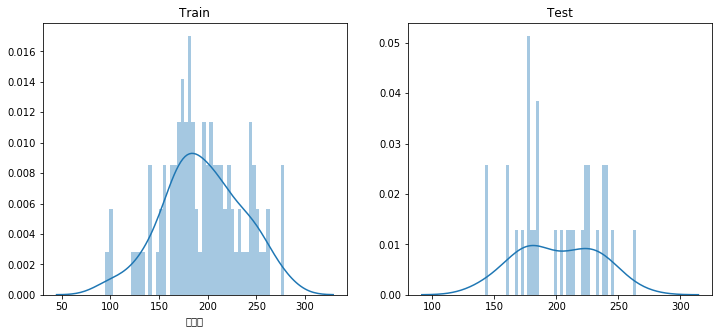

In [31]:
# 예측한 데이터를 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)
sns.distplot(Y_train, ax = ax1, bins=50) # 50개정도로 나눔
ax1.set(title = 'Train')
sns.distplot(pre, ax = ax2, bins = 50)
ax2.set(title = 'Test')